In [19]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import r2_score
from scipy.optimize import minimize
from scipy import stats
from scipy.stats import powerlognorm
from scipy.stats import lognorm
from scipy.stats import beta
from scipy.stats import gamma
#from scipy.stats import powerlaw
from scipy.stats import chi2
from scipy.stats import genpareto
from scipy.stats import expon
from scipy.stats import truncnorm
from scipy.stats import norm
from scipy.stats import gengamma
import pandas as pd 
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
from sklearn.metrics import r2_score
import seaborn as sns

In [20]:
def fitness_GGD_fit(pars):
    a = pars[0]
    c = pars[1]
    l = pars[3]
    alpha = pars[2]

    yPred =(1/(x))*gengamma.pdf(np.log(x),a=a, c=c,  loc = l, scale=alpha)
    #yPred =gengamma.pdf(np.log(x),a=a, c=c,  loc = -l, scale=alpha)
    LL = -np.sum( stats.norm.logpdf(yPred*tot, loc=y*tot, scale=np.sqrt(tot*y*(1-y)) ) )
    #sd = pars[4]
    #LL = -np.sum(stats.norm.logpdf(yPred, loc=y, scale= sd ) )
    return(LL)

def GGD_fit(pars):
    a = pars[0]
    c = pars[1]
    l = pars[3]
    alpha = pars[2]
    yPred =(1/(x))*gengamma.pdf(np.log(x),a=a, c=c, loc = l, scale=alpha)
    #yPred =gengamma.pdf(np.log(x),a=a, c=c,  loc = -l, scale=alpha)
    return(yPred)

In [21]:
data_counts = pd.read_pickle('Covid_counts_de.pkl')

data_counts['Count'].to_pickle('Covid_counts_de2.pkl')

size_distribution = data_counts.groupby('Count')['Count'].count()
size_distribution.head()
tot = size_distribution.sum()


x = np.array(size_distribution.index)
y = np.array(size_distribution/len(data_counts))
y_or = np.array(size_distribution)

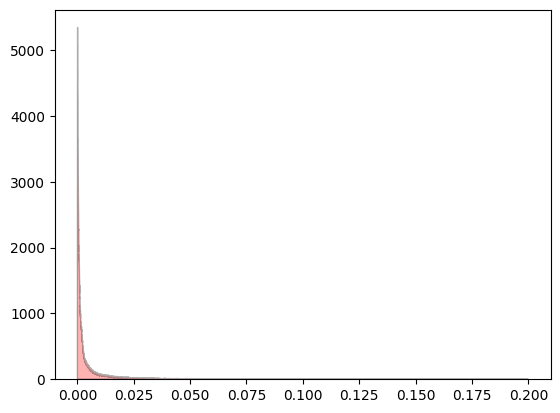

In [22]:
data = pd.read_csv('casc14.txt', sep=" ", header=None)
data.columns = ["Tweet", "C", "a", "g", "shift", "r"]
data=data[data.r>0.85]
C = data['C']
ag = -1 * data['a'] 
g = data['g']
#shift = data['shift']
r = data['r']
a = -1 * data['a']*data['g']
a.columns = ["a"]
amod = a[a<0.2]
n1, bins1, patches1 = plt.hist(amod, 10000, facecolor='r', histtype='stepfilled', alpha=0.3, ec="k")

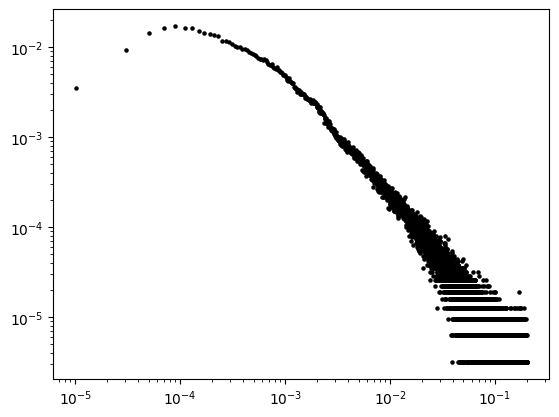

In [23]:
mid=(bins1[1]-bins1[0])/2
x=bins1+mid
tot = np.sum(n1)
ynp = np.array(n1)
y=ynp/tot
#y1=n2/(max(n2))
x=x[0:10000]
#x1=x1[0:2500]+(5-x1[0]) #tem que se puxar para 1 no eixo dos x, porque o hist centra a abcissa no meio da barra

#plt.plot(x1, y1, '.', label='data')
#plt.bar(x1,y1, width = 2*mid, alpha = 0.6)
plt.scatter(x, y, color="black", s=5)
#plt.xlim(1,300)
#plt.ylim([10e-7, 1])
plt.yscale("log")
plt.xscale("log")

In [24]:
GGD_init = [8 , 1 , 1 , 0.07]
#GGD_init = [2.45, 0.52 , 0.39 ,0.07]

tot= np.sum(n1)

init_pars = GGD_init
results_GGD = minimize(fitness_GGD_fit, init_pars, method='Nelder-Mead', options={'maxiter': 10000})
sim_g = GGD_fit(results_GGD.x)
rg=r2_score(y, sim_g)
print(rg)
print(results_GGD)

/home/phccduarte/venv2/myenv2/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:1911: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


-0.01886234083093674
 final_simplex: (array([[8.  , 1.  , 1.  , 0.07],
       [8.  , 1.  , 1.  , 0.07],
       [8.  , 1.  , 1.  , 0.07],
       [8.  , 1.  , 1.  , 0.07],
       [8.  , 1.  , 1.  , 0.07]]), array([nan, nan, nan, nan, nan]))
           fun: nan
       message: 'Maximum number of iterations has been exceeded.'
          nfev: 59999
           nit: 10000
        status: 2
       success: False
             x: array([8.  , 1.  , 1.  , 0.07])


ValueError: x and y must have same first dimension, but have shapes (10000,) and (1077,)

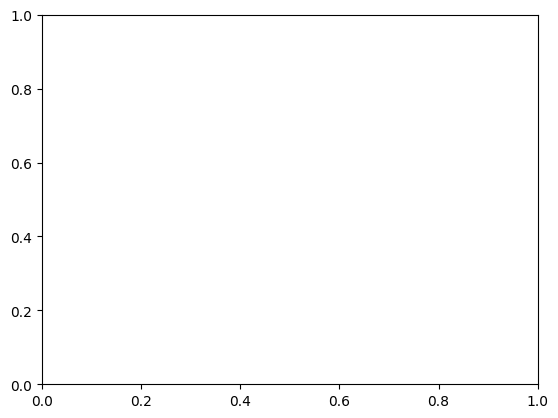

In [25]:
y_un = np.full(len(x), 1)

plt.plot(x, y_or, '.', color='k', alpha=0.5, label='Data')
plt.plot(x, sim_g*5387880, '-', linewidth=3, alpha=0.8, label='fit Generalized Gamma Function')
plt.plot(x, y_un, '-', linewidth=3, alpha=0.8)
plt.legend()
#plt.grid()
#plt.xlim([-10, 200])
plt.ylim([0.1, 50e6])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Size of Cascades")
plt.ylabel("Number of Cascades")

#plt.show()
#plt.savefig("dist.png")

/tmp/ipykernel_178799/1005490247.py:17: RuntimeWarning: divide by zero encountered in true_divide
  y=1/x


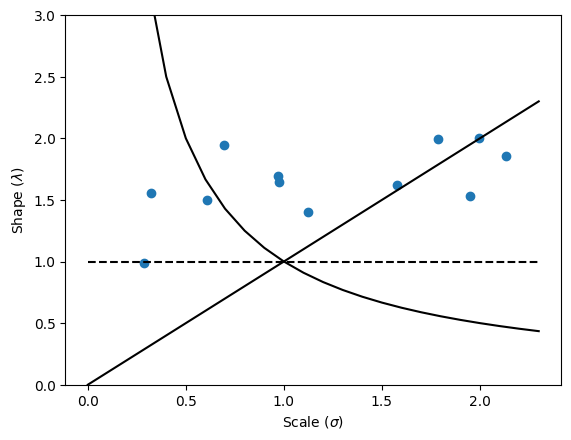

In [26]:
data = pd.read_csv('gamma_vals.txt', sep=" ", header=None)
data.columns = ["id", "a", "c", "alpha", "l"]
data.head()

a = data['a']
c = data['c']
alpha = data['alpha']

lambd = 1/pow(data['a'], 1/2)
sig = lambd/data['c']
be = data['alpha'] * pow(lambd,2)
beta = -1 * np.log(be)

plt.plot(lambd, sig, 'o', label='data')
x = np.arange(0,2.4,0.1)
plt.plot(x,x,'-', color='k')
y=1/x

z1 = len(x)
z = np.full(z1, 1)
plt.plot(x,z,'--', color='k')


plt.ylim([0, 3])
plt.plot(x, y, '-', color='k')
plt.xlabel("Scale ($\sigma$)")
plt.ylabel("Shape ($\lambda$)")

plt.savefig("cox_res.png")

In [27]:
data1_counts = pd.read_pickle('Filme_counts_pt.pkl')
data1_counts['Count'].to_pickle('Filme_counts_pt2.pkl')
size_distribution1 = data1_counts.groupby('Count')['Count'].count()
x1 = np.array(size_distribution1.index)
y1 = np.array(size_distribution1/len(data1_counts))

data2_counts = pd.read_pickle('Film_counts_nl.pkl')
data2_counts['Count'].to_pickle('Film_counts_nl2.pkl')
size_distribution2 = data2_counts.groupby('Count')['Count'].count()
x2 = np.array(size_distribution2.index)
y2 = np.array(size_distribution2/len(data2_counts))

data3_counts = pd.read_pickle('Film_counts_de.pkl')
data3_counts['Count'].to_pickle('Film_counts_de2.pkl')
size_distribution3 = data3_counts.groupby('Count')['Count'].count()
x3 = np.array(size_distribution3.index)
y3 = np.array(size_distribution3/len(data3_counts))

data4_counts = pd.read_pickle('Filme_counts_it.pkl')
data4_counts['Count'].to_pickle('Filme_counts_it2.pkl')
size_distribution4 = data4_counts.groupby('Count')['Count'].count()
x4 = np.array(size_distribution4.index)
y4 = np.array(size_distribution4/len(data4_counts))

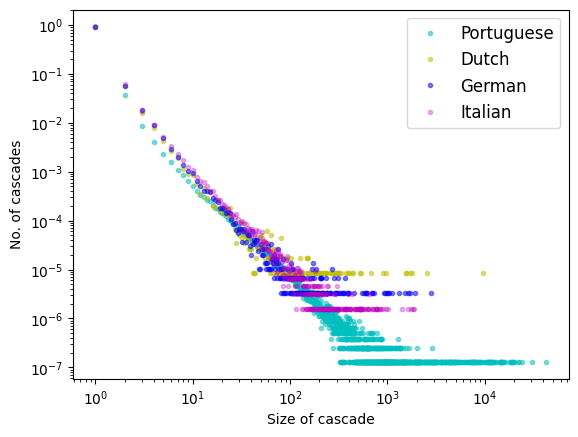

In [28]:
plt.plot(x1, y1, '.', color='c', alpha=0.5, label='Portuguese')
plt.plot(x2, y2, '.', color='y', alpha=0.5, label='Dutch')
plt.plot(x3, y3, '.', color='b', alpha=0.5, label='German')
plt.plot(x4, y4, '.', color='m', alpha=0.3, label='Italian')
plt.legend(scatterpoints=1, loc='upper right', prop={'size': 12})
plt.xlabel("Size of cascade")
plt.ylabel("No. of cascades")
plt.xscale("log")
plt.yscale("log")